In [1]:
from src.lib.utils.FileHandling.FileHandlingInterface import *
from src.lib.SVCDSeg.SVCD import *
import matplotlib.pyplot as plt
import logging
import time
import warnings

In [2]:
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.DEBUG)
warnings.simplefilter("always", RuntimeWarning)

In [3]:
PASCAL_DEMO_IMAGE_PATH = r".\data\demoPascal\2008_003147.jpg"
PASCAL_DEMO_IMAGE_PATH1 = r".\data\demoPascal\2010_005258.jpg"

In [4]:
PASCAL_DEMO_SCRIBBLE_PATH = r".\data\demoPascal\2008_003147.xml"
PASCAL_DEMO_SCRIBBLE_PATH1 = r".\data\demoPascal\2010_005258.xml"

In [5]:
sample_image = TargetImage(
    PASCAL_DEMO_IMAGE_PATH1           
)

In [6]:
sample_scribble = EncodedScribble(
    PASCAL_DEMO_SCRIBBLE_PATH1
)

In [7]:
n_classes = sample_scribble.get_n_classes()

In [8]:
segmenter = SVCDSeg(
    n_classes,
    #alpha = 13.0, 
    #sigma = 18.0,
    max_iter = 2000,
    debug = 0
)

In [9]:
fitted_segmentation = segmenter.fit(
    sample_image,
    sample_scribble 
)

  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]C:\Users\lollo\Desktop\GM\T2_DSBA_Graphical_Methods\src\lib\probabilityEstim\Likelihood.py:168: RuntimeWarning: invalid value encountered in divide
  kde_likelihood_map /= np.sum(kde_likelihood_map, axis = 0) # normalize to sum to one over each class
  0%|                                                                               | 1/2000 [00:04<2:13:42,  4.01s/it]

dtype float64


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:35<00:00,  9.29it/s]


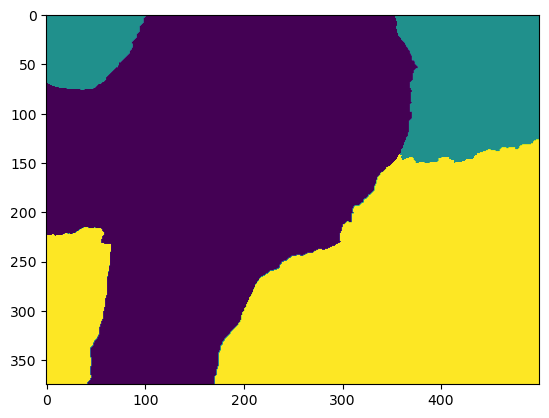

In [10]:
fig, ax = plt.subplots()
im1 = ax.imshow(np.argmax(segmenter.theta, axis = 0).transpose(1, 0))

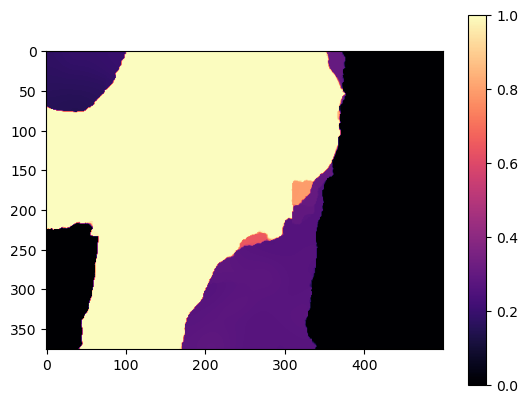

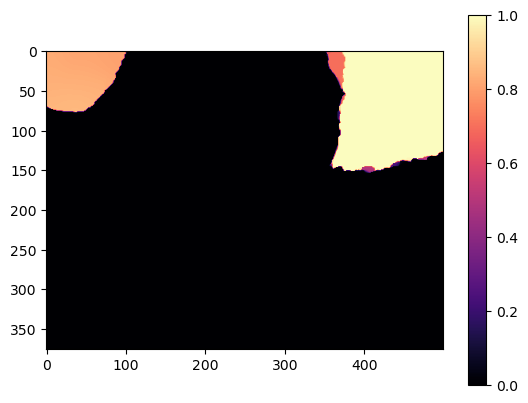

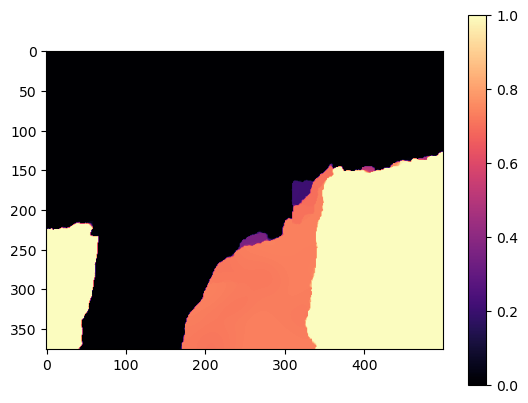

In [11]:
for segment in segmenter.theta:
    fig, ax = plt.subplots()
    vmin = np.min(segment)
    vmax = np.max(segment)
    im1 = ax.imshow(segment.transpose((1, 0)), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
    fig.colorbar(im1, ax=ax, label='')
    plt.show()

In [12]:
# for idx in range(len(segmenter.theta_history)):
#     a = np.argmax(segmenter.theta_history[idx], axis = 0)
#     plt.imshow(a.transpose(1, 0))
#     plt.show()

In [13]:
# for idx in range(len(segmenter.xi_history)):
#     #dual_vars_update = segmenter.tau_dual * segmenter.utils.derivative(segmenter.theta_bar_history[idx])
    
#     dual_vars_update = segmenter.xi_history[idx]
    
#     #dual_vars_update = segmenter.utils.projection_kappa(dual_vars_update, half_g)
#     dual_vars_update = np.sum(dual_vars_update**2, axis = 0)
#     dual_vars_update = np.sqrt(dual_vars_update).transpose(2, 1, 0)
#     dual_vars_update = np.mean(dual_vars_update, axis = 2)
#     vmin = np.min(dual_vars_update)
#     vmax = np.max(dual_vars_update)
#     vmin = np.min(dual_vars_update)
#     vmax = np.max(dual_vars_update)


#     fig, ax = plt.subplots()
#     im1 = ax.imshow(dual_vars_update, cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
#     fig.colorbar(im1, ax=ax, label='')

#     plt.show()

In [14]:
np.all(segmenter.xi_history[-2] == segmenter.xi_history[-1])

False

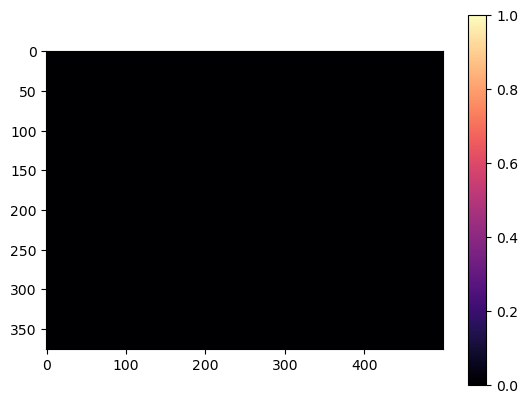

In [15]:
dual_vars = np.sum(segmenter.xi_history[0]**2, axis = 0)
dual_vars = np.sqrt(dual_vars).transpose(2, 1, 0)
dual_vars = np.mean(dual_vars, axis = 2)
vmin = np.min(dual_vars)
vmax = np.max(dual_vars)


fig, ax = plt.subplots()
fig.colorbar(im1, ax=ax, label='')
im1 = ax.imshow(dual_vars, cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)

plt.show()

In [16]:
# dual_vars = np.sum(segmenter.xi**2, axis = 0)
# dual_vars = np.sqrt(dual_vars).transpose(2, 1, 0)
# #dual_vars = np.mean(dual_vars, axis = 2)
# #vmin = np.min(dual_vars)
# #vmax = np.max(dual_vars)


# fig, ax = plt.subplots()
# fig.colorbar(im1, ax=ax, label='')
# im1 = ax.imshow(dual_vars, cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)

# plt.show()

In [17]:
segmenter.dual_energy_history[-1]

625.6647695513072

C:\Users\lollo\AppData\Local\Temp\ipykernel_23288\2322242096.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


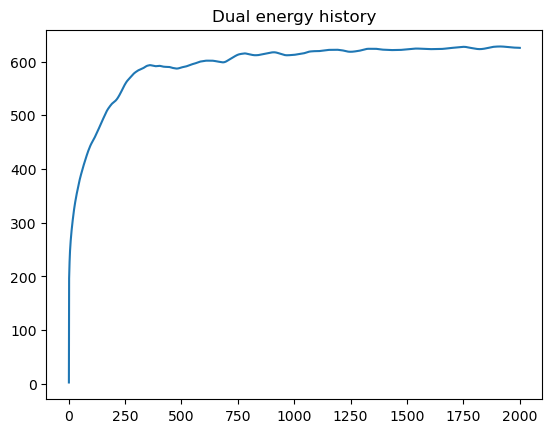

In [18]:
fig, ax = plt.subplots()

im_dual = ax.plot(segmenter.dual_energy_history)
#im_primal = ax.plot(segmenter.primal_energy_history)
ax.set_title("Dual energy history")
fig.show()

Text(0.5, 1.0, 'Primal energy history')

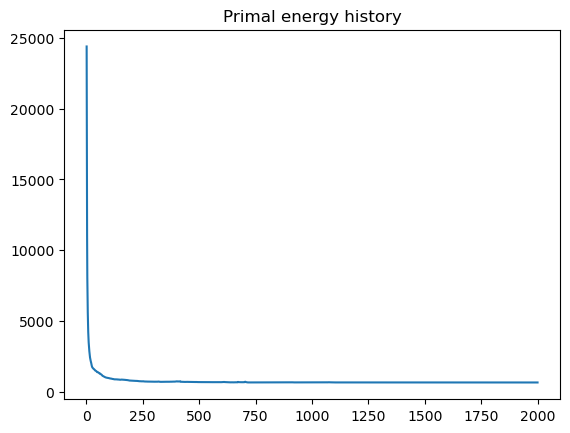

In [19]:
fig, ax = plt.subplots()
ax.plot(segmenter.primal_energy_history)
ax.set_title("Primal energy history")


C:\Users\lollo\AppData\Local\Temp\ipykernel_23288\1159812170.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


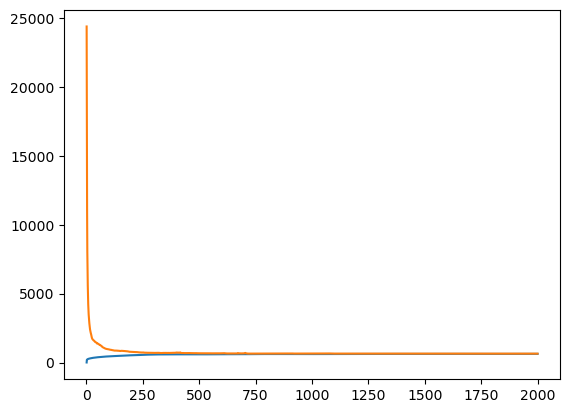

In [20]:
fig, ax = plt.subplots()

im_dual = ax.plot(segmenter.dual_energy_history)
im_primal = ax.plot(segmenter.primal_energy_history)
fig.show()

In [21]:
segmenter.primal_energy_history[-1] - segmenter.dual_energy_history[-1]

18.64044824981488

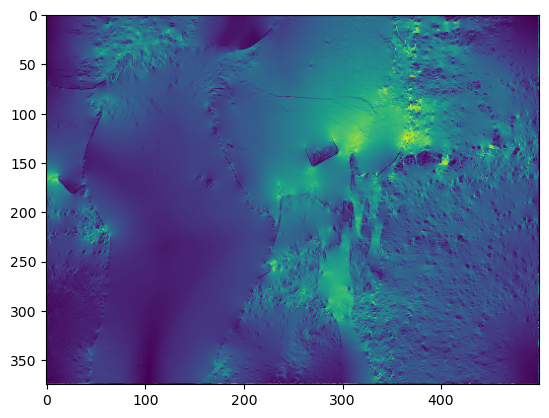

In [25]:
dual_vars = np.sum(segmenter.xi**2, axis = 0)
dual_vars = np.sqrt(dual_vars).transpose(2, 1, 0)
dual_vars = np.mean(dual_vars, axis = 2)
plt.imshow(dual_vars)

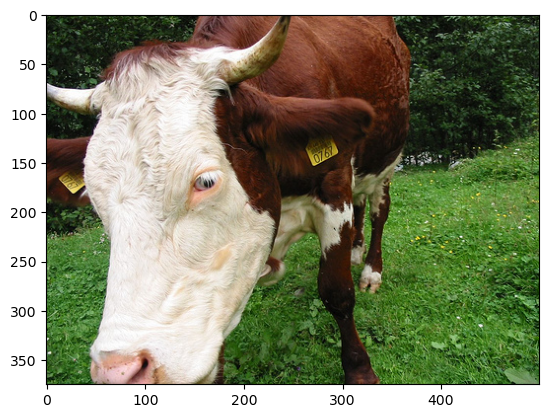

In [22]:
fig, ax = plt.subplots()
sample_image_array = sample_image.get_image_array()
sample_image_array.shape
ax.imshow(sample_image_array.transpose(2, 1, 0))

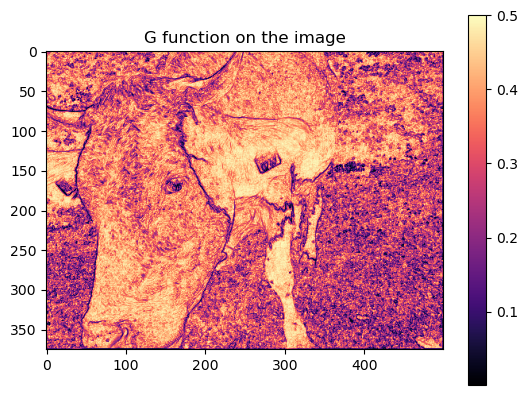

In [23]:
im_arr = sample_image.get_image_array()
im_shape = sample_image.get_image_shape()
segmenter.utils.make_derivative_matrix(*im_shape[1::-1])
#half_g = segmenter.utils.init_halfg(im_arr)
half_g = segmenter.halfg
_, w, h = half_g.shape
half_g = half_g.reshape(w, h)
half_g.shape
vmin = np.min(half_g)
vmax = np.max(half_g)

fig, ax = plt.subplots()

im1 = ax.imshow(half_g.transpose(1, 0), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
ax.set_title("G function on the image")
fig.colorbar(im1, ax=ax, label='')

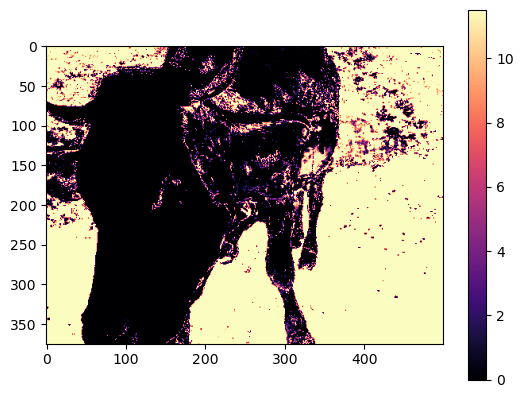

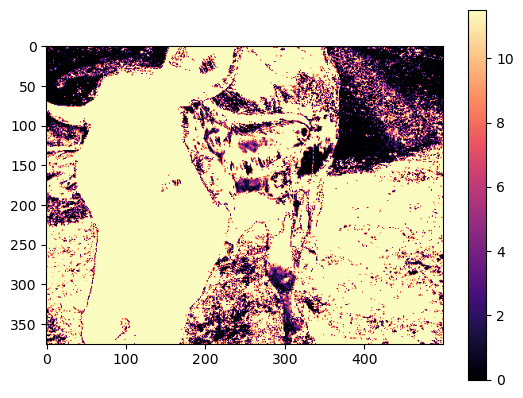

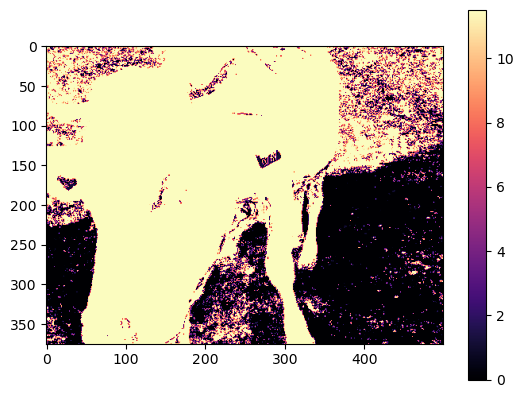

In [24]:
for likelihood in segmenter.fitted_likelihood:
    fig, ax = plt.subplots()
    vmin = np.min(likelihood)
    vmax = np.max(likelihood)
    im1 = ax.imshow(likelihood.transpose(1, 0), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
    fig.colorbar(im1, ax=ax, label='')